<a href="https://colab.research.google.com/github/Cassiesanu8/Capstone_Project/blob/main/LinearRegressionVisualizing1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from time import sleep

In [8]:
x = np.random.rand(500)
x[:5]

array([0.81040566, 0.47769064, 0.07187341, 0.291448  , 0.75658353])

In [9]:
m = 2 # slope or weight
c = 3 # coffecient or bias

In [10]:
noise = np.random.randn(500)/4
noise[:5]

array([-0.0489272 ,  0.03708163,  0.06933466,  0.1000725 , -0.22701088])

In [11]:
# Equation of the line y = mx + c
y = x * m + c + noise
y[:5]

array([4.57188411, 3.9924629 , 3.21308147, 3.68296849, 4.28615618])

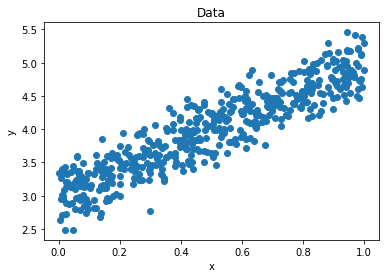

In [12]:
#Visualise Our data
plt.scatter(x,y)
plt.title("Data")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [13]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(x)
targets = torch.from_numpy(y)
print(inputs[:5])
print(targets[:5])

tensor([0.8104, 0.4777, 0.0719, 0.2914, 0.7566], dtype=torch.float64)
tensor([4.5719, 3.9925, 3.2131, 3.6830, 4.2862], dtype=torch.float64)


In [14]:
# Changing the data type to float32 as our model accepts float32 data type
inputs = inputs.type(torch.float32) 
targets = targets.type(torch.float32)

In [15]:
# reshaping our data into n-rows and 1 columns. Model takes 2D array as an input
inputs = inputs.reshape(-1,1)
targets = targets.reshape(-1,1)


In [16]:
print(targets[:5])

tensor([[4.5719],
        [3.9925],
        [3.2131],
        [3.6830],
        [4.2862]])


In [17]:
# Define linear regression model
model = nn.Linear(1, 1) # (no. of input features, no. of output features)
print(model.weight) # Weight of the model
print(model.bias) # Bias of the model

Parameter containing:
tensor([[0.3562]], requires_grad=True)
Parameter containing:
tensor([0.3227], requires_grad=True)


In [18]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[0.3562]], requires_grad=True), Parameter containing:
 tensor([0.3227], requires_grad=True)]

In [19]:
# Define loss function
import torch.nn.functional as F

loss_fn = F.mse_loss
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(12.4603, grad_fn=<MseLossBackward0>)


In [20]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5) # lr --> learning rate

In [21]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt,inputs, targets):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):

        # Train with batches of data
        for xb,yb in zip(inputs, targets):
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
            
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            preds_ = model(inputs)
            plt.scatter(inputs,targets, label="Data")
            plt.plot(inputs,preds_.detach().numpy(),"r-", label="Prediction")
            plt.title('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            plt.legend()
            #plt.savefig("lr_images_final/{}.png".format(epoch+1))
            plt.show()
            sleep(.2)


Epoch [10/310], Loss: 10.6053


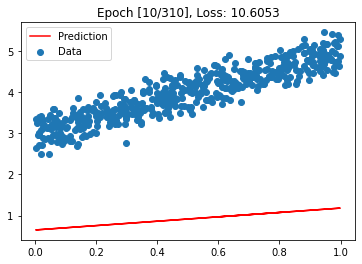

Epoch [20/310], Loss: 8.2618


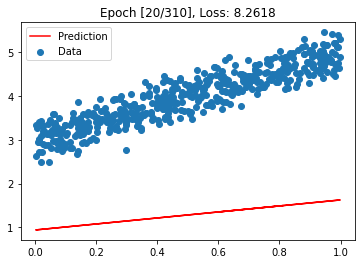

Epoch [30/310], Loss: 6.4388


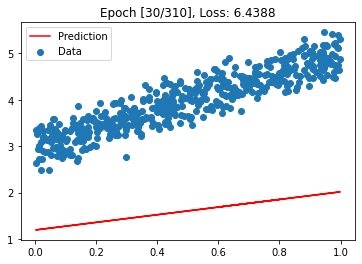

Epoch [40/310], Loss: 5.0204


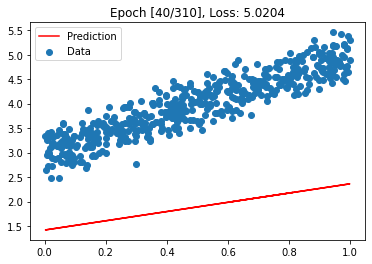

Epoch [50/310], Loss: 3.9165


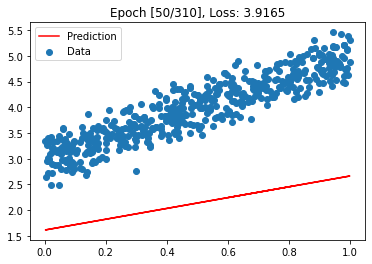

Epoch [60/310], Loss: 3.0571


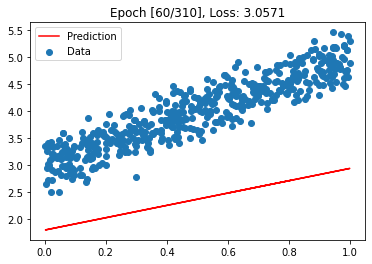

Epoch [70/310], Loss: 2.3879


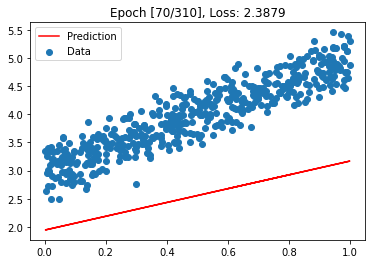

Epoch [80/310], Loss: 1.8666


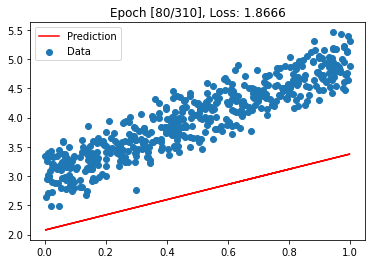

Epoch [90/310], Loss: 1.4603


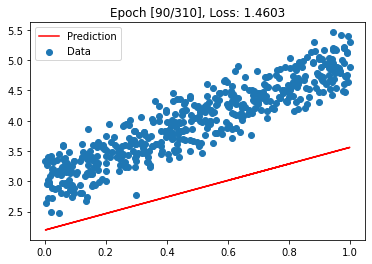

Epoch [100/310], Loss: 1.1436


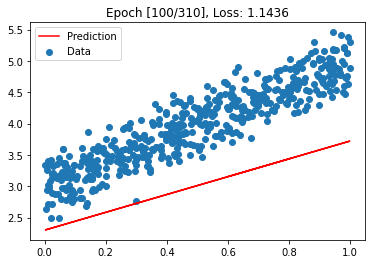

Epoch [110/310], Loss: 0.8965


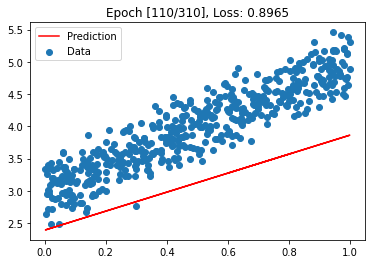

Epoch [120/310], Loss: 0.7036


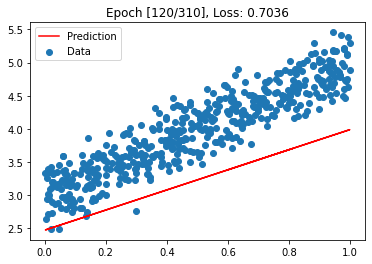

Epoch [130/310], Loss: 0.5530


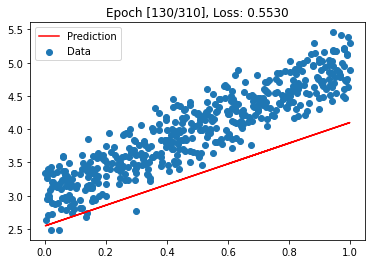

Epoch [140/310], Loss: 0.4352


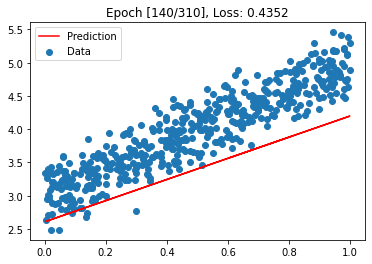

Epoch [150/310], Loss: 0.3431


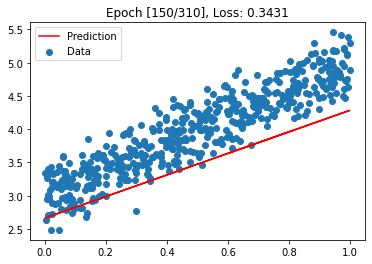

Epoch [160/310], Loss: 0.2710


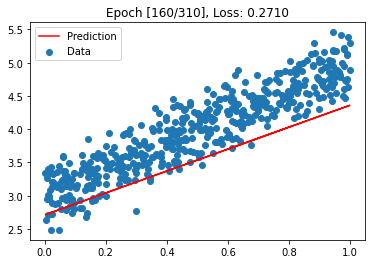

Epoch [170/310], Loss: 0.2145


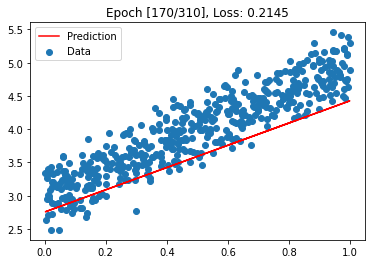

Epoch [180/310], Loss: 0.1702


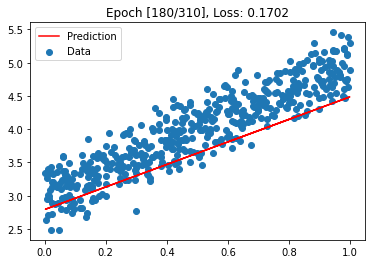

Epoch [190/310], Loss: 0.1354


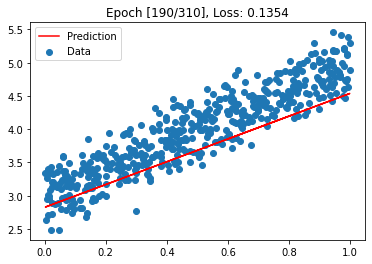

Epoch [200/310], Loss: 0.1080


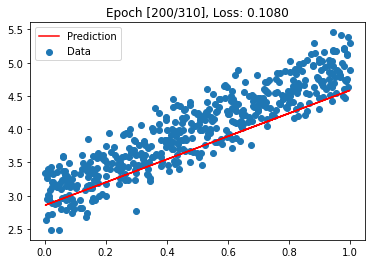

Epoch [210/310], Loss: 0.0864


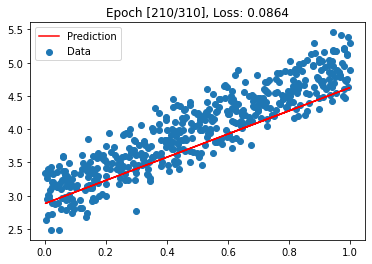

Epoch [220/310], Loss: 0.0694


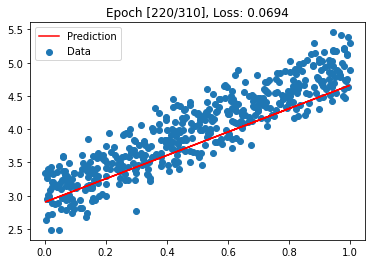

Epoch [230/310], Loss: 0.0559


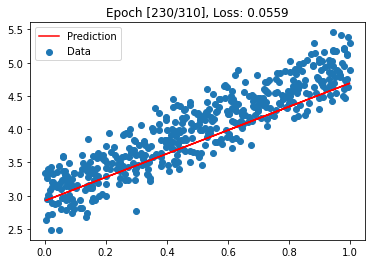

Epoch [240/310], Loss: 0.0453


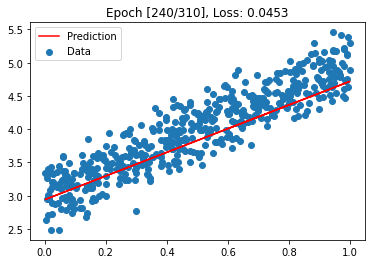

Epoch [250/310], Loss: 0.0368


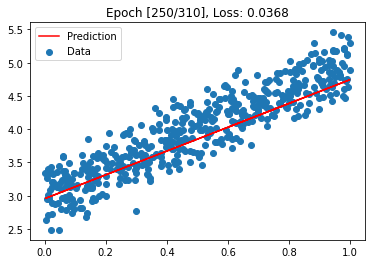

Epoch [260/310], Loss: 0.0301


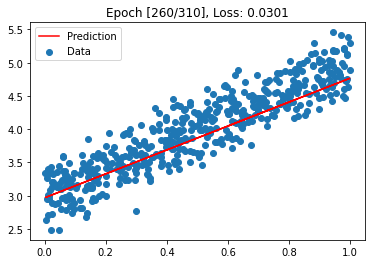

Epoch [270/310], Loss: 0.0247


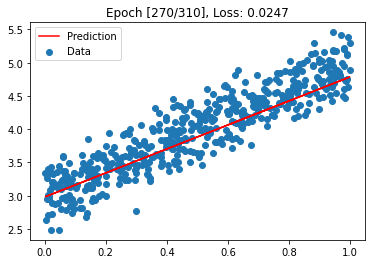

Epoch [280/310], Loss: 0.0204


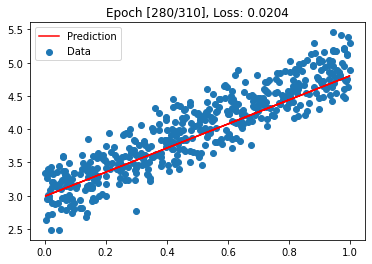

Epoch [290/310], Loss: 0.0169


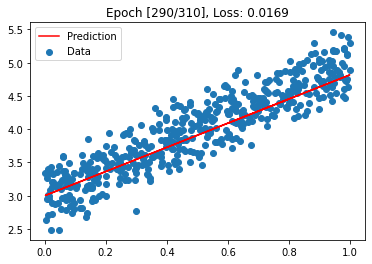

Epoch [300/310], Loss: 0.0142


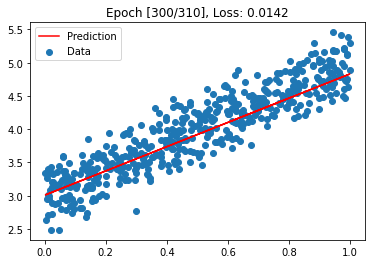

Epoch [310/310], Loss: 0.0119


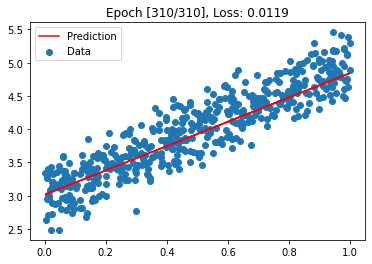

In [22]:
fit(310, model, loss_fn, opt, inputs, targets, )